# Capstone Webscrapping using BeautifulSoup

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 7/12/2021 and 1/6/2022.

## background

At this project we try to scrap historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 7/12/2021 and 1/6/2022. We will try to scrap this sites for educational purpose only. The site that we will use is [exchange-rates.org](https://www.exchange-rates.org/history/IDR/USD/T)

We will scrap 2 points from this sites. The points that we will use are *tanggal* and *harga harian*. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [121]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [122]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [123]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Let's back to our web page first. The information that we need are the period of time and the exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 7/12/2021 and 1/6/2022, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this. 

<img src="asset/img1.png">

From inspect element we know that we need to find the line table with class `table table-striped table-hover table-hover-solid-row table-simple history-data`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 

In [124]:
table = soup.find("table", attrs={"class":"table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2022">
     14,387.13904
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2022">
     USD IDR rate for 1/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


As we can see from the line we just extract, we get all the content we needed. The `table` tag defines an HTML table. An HTML table consists of one `table` element and one or more `tr`, `th`, and `td` elements.

Now, we need to get 2 information, that is the period of time and the exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD). Which you can read from above code, both of the information are contained within `td`.

So, we can extract all of the `td` tag first, and then we will try to filter the period of time and the exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD)

In [125]:
row = table.find_all("td")

the first 5 data of the period of time from the html

In [126]:
row[::4][:5]

[<td>1/6/2022</td>,
 <td>1/5/2022</td>,
 <td>1/4/2022</td>,
 <td>1/3/2022</td>,
 <td>12/31/2021</td>]

the first 5 data of the exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) from the html

In [127]:
row[2::4][:5]

[<td><a href="/Rate/USD/IDR/1-6-2022">14,387.13904</a> IDR</td>,
 <td><a href="/Rate/USD/IDR/1-5-2022">14,376.59427</a> IDR</td>,
 <td><a href="/Rate/USD/IDR/1-4-2022">14,306.22137</a> IDR</td>,
 <td><a href="/Rate/USD/IDR/1-3-2022">14,271.10676</a> IDR</td>,
 <td><a href="/Rate/USD/IDR/12-31-2021">14,184.77099</a> IDR</td>]

As you can see get already get the necessary key to extract all needed data. To get the only text information you can add `.text`.

In [128]:
row[2::4][0].text

'14,387.13904 IDR'

Finding row length.

In [129]:
row_length = len(row[2::4])
row_length

129

Here is the scrapping process: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period of time and the exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD). 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [130]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get tanggal
    tanggal = row[::4][i].text
    
    #get harga harian
    harga_harian = row[2::4][i].text
    harga_harian = harga_harian.strip() #to remove excess white space
    
    temp.append((tanggal,harga_harian)) 
    
temp 

[('1/6/2022', '14,387.13904 IDR'),
 ('1/5/2022', '14,376.59427 IDR'),
 ('1/4/2022', '14,306.22137 IDR'),
 ('1/3/2022', '14,271.10676 IDR'),
 ('12/31/2021', '14,184.77099 IDR'),
 ('12/30/2021', '14,249.76380 IDR'),
 ('12/29/2021', '14,198.28676 IDR'),
 ('12/28/2021', '14,221.34174 IDR'),
 ('12/27/2021', '14,227.31928 IDR'),
 ('12/24/2021', '14,264.51755 IDR'),
 ('12/23/2021', '14,256.89960 IDR'),
 ('12/22/2021', '14,298.20378 IDR'),
 ('12/21/2021', '14,304.01234 IDR'),
 ('12/20/2021', '14,382.49273 IDR'),
 ('12/17/2021', '14,389.66562 IDR'),
 ('12/16/2021', '14,330.91366 IDR'),
 ('12/15/2021', '14,251.62584 IDR'),
 ('12/14/2021', '14,341.93227 IDR'),
 ('12/13/2021', '14,357.75629 IDR'),
 ('12/10/2021', '14,370.27875 IDR'),
 ('12/9/2021', '14,344.97904 IDR'),
 ('12/8/2021', '14,370.91961 IDR'),
 ('12/7/2021', '14,347.32452 IDR'),
 ('12/6/2021', '14,432.56943 IDR'),
 ('12/3/2021', '14,389.50020 IDR'),
 ('12/2/2021', '14,392.39767 IDR'),
 ('12/1/2021', '14,347.93748 IDR'),
 ('11/30/2021', 

As you can see, the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that.

In [131]:
temp = temp[::-1]
temp

[('7/12/2021', '14,491.59294 IDR'),
 ('7/13/2021', '14,476.52203 IDR'),
 ('7/14/2021', '14,404.17703 IDR'),
 ('7/15/2021', '14,469.95831 IDR'),
 ('7/16/2021', '14,495.41215 IDR'),
 ('7/19/2021', '14,490.12260 IDR'),
 ('7/20/2021', '14,514.10964 IDR'),
 ('7/21/2021', '14,495.34596 IDR'),
 ('7/22/2021', '14,508.09177 IDR'),
 ('7/23/2021', '14,492.63051 IDR'),
 ('7/26/2021', '14,487.54718 IDR'),
 ('7/27/2021', '14,468.66842 IDR'),
 ('7/28/2021', '14,414.21667 IDR'),
 ('7/29/2021', '14,467.14994 IDR'),
 ('7/30/2021', '14,501.55250 IDR'),
 ('8/2/2021', '14,445.82502 IDR'),
 ('8/3/2021', '14,391.49693 IDR'),
 ('8/4/2021', '14,313.11092 IDR'),
 ('8/5/2021', '14,315.95314 IDR'),
 ('8/6/2021', '14,403.07373 IDR'),
 ('8/9/2021', '14,363.60538 IDR'),
 ('8/10/2021', '14,379.25224 IDR'),
 ('8/11/2021', '14,385.48676 IDR'),
 ('8/12/2021', '14,387.28127 IDR'),
 ('8/13/2021', '14,327.19776 IDR'),
 ('8/16/2021', '14,376.39296 IDR'),
 ('8/17/2021', '14,439.92418 IDR'),
 ('8/18/2021', '14,372.20861 IDR')

## Creating data frame & Data wrangling

Put the array into dataframe

In [132]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,7/12/2021,"14,491.59294 IDR"
1,7/13/2021,"14,476.52203 IDR"
2,7/14/2021,"14,404.17703 IDR"
3,7/15/2021,"14,469.95831 IDR"
4,7/16/2021,"14,495.41215 IDR"


Let's check our dataframe data types to see if our data is useable.

In [133]:
df.dtypes

tanggal         object
harga_harian    object
dtype: object

We will change the `harga_harian` to float datatype, but before we can do that we need to change the "," to "" and the " IDR" to "" first. To do this we can use the help of str.replace(). Then lastly let's fix our `tanggal` data type.

In [134]:
df['harga_harian'] = df['harga_harian'].str.replace(" IDR","")
df['harga_harian'] = df['harga_harian'].str.replace(",","")
df['harga_harian'] = df['harga_harian'].astype('float')
df['tanggal'] = df['tanggal'].astype('datetime64')
df.dtypes

tanggal         datetime64[ns]
harga_harian           float64
dtype: object

We will also change the format display of the `harga_harian`

In [135]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

In [136]:
df.head()

,tanggal,harga_harian
0,2021-07-12,"14,491.59294"
1,2021-07-13,"14,476.52203"
2,2021-07-14,"14,404.17703"
3,2021-07-15,"14,469.95831"
4,2021-07-16,"14,495.41215"


To make our plot behave like we want, we need to set our index of our dataframe to our time column. We can use set_index()

In [137]:
df = df.set_index('tanggal')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

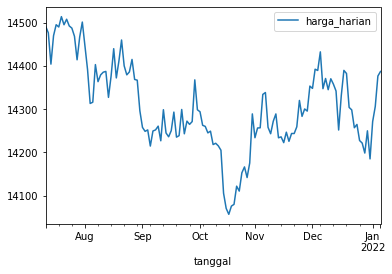

In [138]:
df.plot();

> 📈 **Insight yang dapat diambil:**
- Harga harian kurs USD dari bulan Agustus 2021 hingga Januari 2022 cenderung fluktuatif. 
- Harga harian kurs USD dari bulan Agustus 2021 cenderung mengalami penurunan hingga bulan Oktober 2021. Setelah itu, cenderung mengalami kenaikan hingga bulan Desember 2021 dan kembali mengalami sedikit penurunan pada akhir Desember 2021 dan kembali mengalami penaikan pada awal Januari 2022 
- Harga harian kurs USD terendah berada pada bulan Oktober 2021.
- Harga harian kurs USD tertinggi berada pada bulan Agustus 2021.

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

We will use the sama dataframe as before, but we will reset the index first.

In [139]:
df1 = df.reset_index()

In [140]:
df1.head()

,tanggal,harga_harian
0,2021-07-12,"14,491.59294"
1,2021-07-13,"14,476.52203"
2,2021-07-14,"14,404.17703"
3,2021-07-15,"14,469.95831"
4,2021-07-16,"14,495.41215"


We will make a new column that contained day of week.

In [146]:
df1['hari'] = df1['tanggal'].dt.day_name()
df1.head()

,tanggal,harga_harian,hari
0,2021-07-12,"14,491.59294",Monday
1,2021-07-13,"14,476.52203",Tuesday
2,2021-07-14,"14,404.17703",Wednesday
3,2021-07-15,"14,469.95831",Thursday
4,2021-07-16,"14,495.41215",Friday


We will make aggregation table to summarize the average of exchange rates based on each day.

In [147]:
dfhari = df1.groupby('hari').mean().sort_values('harga_harian', ascending=False)
dfhari

,harga_harian
hari,
Friday,"14,311.5355376"
Monday,"14,310.206313076924"
Thursday,"14,308.48809923077"
Tuesday,"14,304.645753846155"
Wednesday,"14,299.73381653846"


To make the plot more insightful, we will sort the day of week.

In [148]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
dfhari.index = pd.CategoricalIndex(
    data = dfhari.index, # list data yang ingin diubah urutannya
    categories = wday, # list data urutan yang benar
    ordered = True)
dfhari.index

CategoricalIndex(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True, name='hari', dtype='category')

We use the line plot because it is more insightful. If we use the bar plot, the differences in each day don't really look significant or clear.

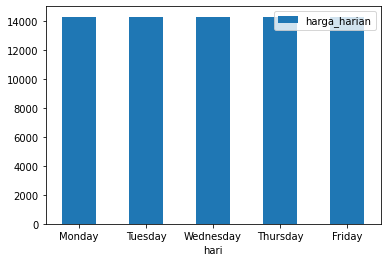

In [150]:
dfhari.sort_index().plot(kind='bar',rot=0);

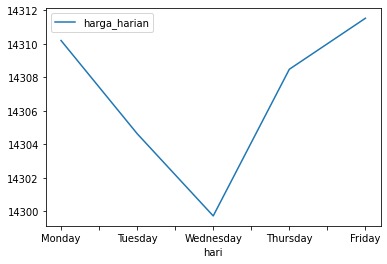

In [145]:
dfhari.sort_index().plot();

> 📈 **Insight yang dapat diambil:**
- Rata-rata harga harian kurs USD pada hari Senin hingga hari Rabu cenderung menurun hingga akhirnya kembali mengalami kenaikan dari hari Rabu hingga Jumat.
- Rata-rata harga harian kurs USD terendah berada pada hari Rabu.
- Rata-rata harga harian kurs USD tertinggi berada pada hari Jumat.
- Kenaikan rata-rata harga harian kurs USD tertinggi berada pada hari Kamis.
- Penurunan rata-rata harga harian kurs USD tertinggi berada pada hari Selasa.